<h1> Heart Disease Dataset Machine Learning Model </h1>
<h2> Jordan Cobb and Aja Brunet </h2>

<h2> Business Understanding </h2>

<p> Heart disease is a common health issue among Americans today, and learning about one's risk as early as possible is extremely important. Anyone could benefit from using prediction tools, especially those who may be at risk without realizing it. Prediction tools can help alert someone that there may be a health concern present and cause them to follow up with serious screening at a medical care facility.  </p>

Import Libraries, load heart disease dataset. spit into features and target. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import plotly.express as px

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
# print(heart_disease.metadata) 
  
# variable information 
# print(heart_disease.variables) 

<h2> Data Understanding </h2>

In [4]:
# Import plotly
#import plotly as px

# Summary statistics 
X.describe()

# Correlation heatmap
correlation_matrix = X.corr()
heatmapFig = px.imshow(correlation_matrix, text_auto = True,
                color_continuous_scale='RdBu', aspect='auto', title="Correlation Heatmap")
heatmapFig.show()


<p> Box Plots comparing Healthy vs Disease </p>

In [5]:
# Comparing the age of healthy vs diseased group
compAgeFig = px.box(X, x=y["num"], y='age', title='Age - Healthy vs. Disease')
compAgeFig.show()

In [6]:
# Comparing the cp of healthy vs diseased group
compCpFig = px.box(X, x=y["num"], y='cp', title='Chest Pain - Healthy vs. Disease')
compCpFig.show()

In [7]:
# Comparing the thalach of healthy vs diseased group
compThalachFig = px.box(X, x=y["num"], y='thalach', title='Thalach - Healthy vs. Disease')
compThalachFig.show()

<p> FROM ACTIVITY: Make the training/test split </p>

In [8]:
# Key features distribution plots: 
#   Make a histogram, Box Plot, Density Plot of relevant data

compHistFig = px.histogram(X, x="chol", histnorm='density', opacity=0.6, title="Chol Distribution Density Plot", color=y["num"])
compHistFig.show()

#Categorical Exploration

<p> This distribution is right-skewed, showing that most patients have an average cholestoral of around 230. We also find that those with a higher cholestoral tend to have higher changes of having heart disease. The majority of patients are within the cholestoral range of 175-325. A surprising observation from this is that there are a few patients with chol 400-419, all with different disease levels, one with none.  </p>

In [9]:
# Box Plot to show distribution of trestbps
distTrestbpsFig = px.box(X, x='trestbps', title='Trestbps Distribtion')
distTrestbpsFig.show()

<p> The distribution given here shows that the majority of patients fall between 120-140 trestbps, with many outside this bound. Here is skewed right  showing there are a good portion of patients with higher-than-average trestbps. Modeling this will show many in the slightly lower region with outliers in higher region. </p>

In [10]:
#Histogram using bins
densHistFig = px.histogram(X, x="thalach", nbins=40, title="Thalach Distribution Plot")
densHistFig.show()

<p> This distribution is slightly skewed left, most patients fall in the 140-175 range. A surprising observation is how there are 37 patients in the 16-164 range, a large amount for an also relatively large value. </p>

In [11]:
# Categorical exploration of Sex compared with chest pain and age. 1=male, 0=female
fig = px.violin(X, x="cp", y="age", color="sex")
fig.show()

<p> From this comparison of chest pain across different ages for men and women, we can see that chest pain is found in men across any ages, but clumps between 45-65 years of age. Surprisingly, aggressive chest pain in women is found around the age of 60, whereas it is a more broad distribution for the other chest pain levels.  </p>

<h2> Data Preparation </h2>

<p> Encode categorical features and handle missing values here: </p>

<p> Now to split for train and test data  </p>

In [12]:
# Missing values
print(X.isnull().sum())
#cleaned_df = X.dropna()
cleaned_df = X.fillna(X.mean(numeric_only=True))
print(cleaned_df.isnull().sum())

y = y['num']     # convert to Pandas Series

# Convert 0 → 0, and 1–4 → 1
y_binary = (y > 0).astype(int)
X_binary = X.copy()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


In [13]:
# Split into test and train sets
# explanation: test_size, 0.2 = 20% of data used for testing.
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y_binary, test_size=0.2, random_state=42
)

<p> Documentation on  how we: 
Handled missing values: We cleaned the data by filling the columns containing missing values with a mean of the relevant column. We found only two features that had missing values(ca, and thal), and were able to create a cleaned dataset.  

Handled categorical data: This dataset pre-processes categorical data values such as sex or cp, giving an itneger value(0,1 or 1-4 repectively) for these features. 
</p>

<h1> Modeling </h1>

<h2> Decision Tree Classifier </h2>

<p> Fit the model </p>

In [14]:
# Default model: 
dTreeDef = DecisionTreeClassifier(random_state=42)
dTreeDef.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


<p> Create predictions using model </p>

In [15]:
# Make prediction on fitted data
y_pred_def = dTreeDef.predict(X_test)
print(y_pred_def)

[0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1]


<p> Analyzing Accuracy, Precision, recall, and f1 scores for default model

In [16]:
# Accuracy
accuracy_def = accuracy_score(y_test, y_pred_def)
print("Model Accuracy:", accuracy_def)

# Precision
precision_def = precision_score(y_test, y_pred_def, average="weighted")
print("Model Precision: ", precision_def)

# Recall
recall_def = recall_score(y_test, y_pred_def, average="weighted")
print("Model Recall: ", recall_def)

# f1 score
f1_def = f1_score(y_test, y_pred_def, average="weighted")
print("Model F1 score: ", f1_def)

Model Accuracy: 0.7377049180327869
Model Precision:  0.7395734179446501
Model Recall:  0.7377049180327869
Model F1 score:  0.7378459368940595


<p> Plot feature importance: </p>

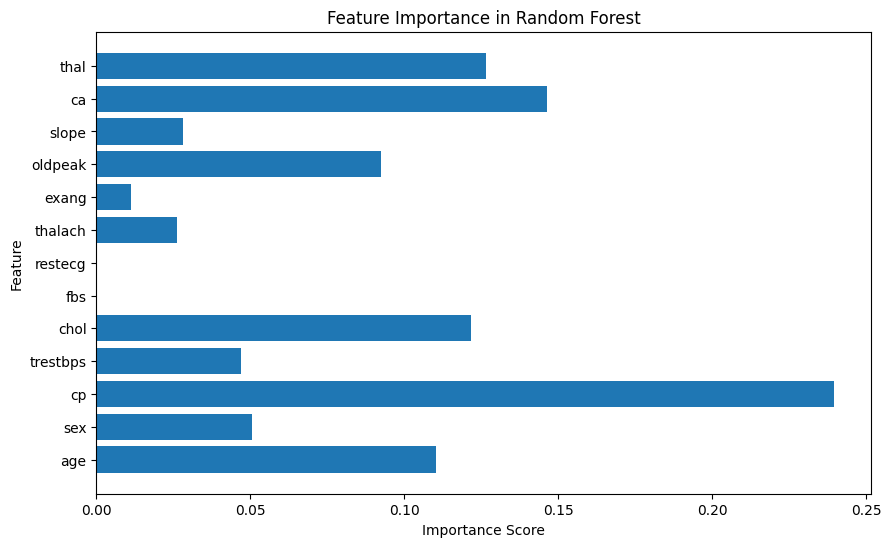

In [17]:
import matplotlib.pyplot as plt

importances = dTreeDef.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

<h3> Using hyperparamater for a tuned model: </h3>

<p> Fit tuned model </p>

In [18]:
# Tuned model using hyperparamter max-depth:
dTreeTuned = DecisionTreeClassifier(max_depth=6, random_state=42)
dTreeTuned.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


<p> Make predictions on tuned model </p>

In [34]:
# Making predictions on tuned model
y_pred_tuned = dTreeTuned.predict(X_test)
print(y_pred_tuned)

dTreeTuned.get_depth()
print("H", dTreeTuned.tree_.node_count)
print(dTreeTuned.tree_.max_depth)

[0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0]
H 63
6


<p> Analyzing Accuracy, Precision, recall, and f1 scores for tuned model

In [20]:
# Accuracy
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Model Accuracy:", accuracy_tuned)

# Precision
precision_tuned = precision_score(y_test, y_pred_tuned, average="weighted")
print("Model Precision: ", precision_tuned)

# Recall
recall_tuned = recall_score(y_test, y_pred_tuned, average="weighted")
print("Model Recall: ", recall_tuned)

# f1 score
f1_tuned = f1_score(y_test, y_pred_tuned, average="weighted")
print("Model F1 score: ", f1_tuned)

Model Accuracy: 0.7540983606557377
Model Precision:  0.7630272509732491
Model Recall:  0.7540983606557377
Model F1 score:  0.7534368012278543


<p> Plot feature importance: </p>

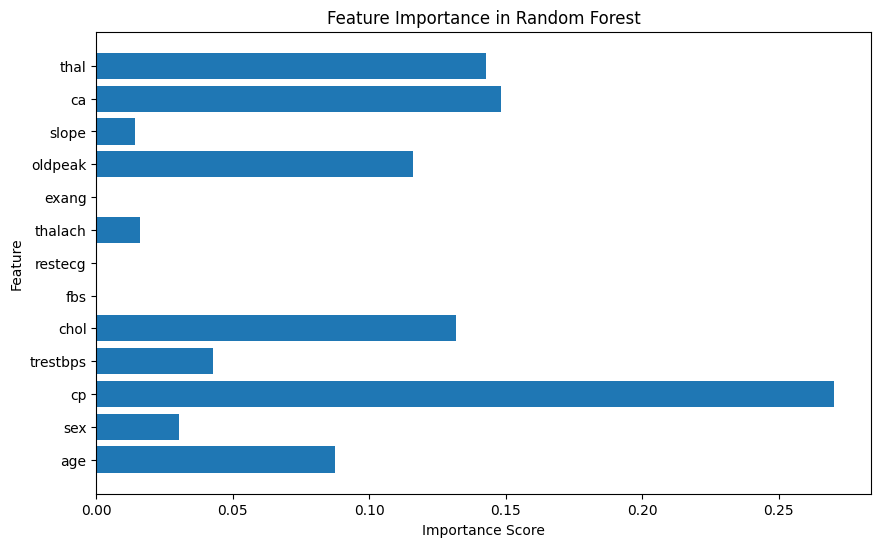

In [21]:
import matplotlib.pyplot as plt

importances = dTreeTuned.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

<h2> Random Forest Classifier </h2>

In [22]:
# Model needs to be with n_estimators(a hyperparameter)
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)


rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred = rf.predict(X_test)
print(y_pred)


[0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1
 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0]


AttributeError: 'RandomForestClassifier' object has no attribute 'get_depth'

<p> Evaluate the Accuracy, Precision, Recall, and f1 score </p>

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average="weighted")
print("Model Precision: ", precision)

# Recall
recall = recall_score(y_test, y_pred, average="weighted")
print("Model Recall: ", recall)

# f1 score
f1 = f1_score(y_test, y_pred, average="weighted")
print("Model F1 score: ", f1)

Model Accuracy: 0.8852459016393442
Model Precision:  0.8895385811192763
Model Recall:  0.8852459016393442
Model F1 score:  0.8852459016393442


In [25]:
# Use classification_report OR query each result separately like before for Decision Tree
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



<p> Plotting Feature Importance For Default Random Forest Classifier Model </p>

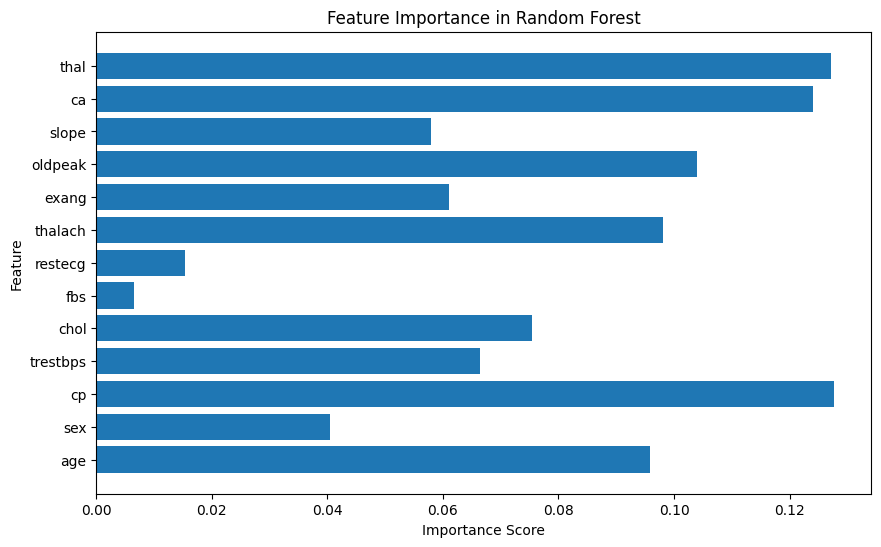

In [26]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

<table> 
    <tr> 
        <th> Model </th>
        <th> Accuracy </th>
        <th> Precision </th>
        <th> Recall </th>
        <th> F1 </th>
        <th> Notes </th>
    </tr>
    <tr> 
        <th> Decision Tree (default) </th>
        <td> 0.7377049 </td>
        <td> 0.7395734 </td>
        <td> 0.7377049 </td>
        <td> 0.7378459 </td>
        <td> baseline </td>
    </tr>
    <tr> 
        <th> Decision Tree (tuned) </th>
        <td> 0.7540983 </td>
        <td> 0.7630272 </td>
        <td> 0.7540983 </td>
        <td> 0.7534368 </td>
        <td> tuning effect </td>
    </tr>
    <tr> 
        <th> Random Forest (tuned) </th>
        <td> 0.8852459 </td>
        <td> 0.8895385 </td>
        <td> 0.8852459 </td>
        <td> 0.8852459 </td>
        <td> usually best </td>
    </tr>
</table>


<h2> Evaluation and Insights </h2>
<p> The model that performed the best was the tuned Random Forest, providing an accuracy and precision of 0.88. This occurred because the Random Forest uses many decision trees to then make a final prediction. Along with the hyperparameters used, this caused for a high accuracy, well directed result each time based on this data and tested with new inputs. 
<br />
The health indicators that were most important in predicting disease were chest pain, thal, and ca(# of major blood vessels). This makes sense because those aspects are good indicators, and seem to have the most weighted effect, on whether a person is more likely to have some severity of heart disease. 
<br />
Hyperparameter tuning in this aspect is interesting, it shows how those different aspects can help or hurt a model, and how delicate they sometimes are. After playing with the hyperparameters a bit, we noticed that some, specifically our chosen use of max_depth, have a large affect on model accuracy. There is definitely a good middle point where the model receives the best outcome based on depth, we ended up liking a max depth of 6 for our Random Forest tree, because lower values were not giving a good variety of results, but the risk of going to deep is important to take into consideration. 
<br />
Insights we learned from these visuals were mainly how chest pain, age, and thalach have some correlation into why a heart disease result might occur. These results are helpful in understanding the data from an unfamiliar view, to see major aspects and the distribution across the dataset. 
<br />
Some ethical considerations regarding our models are how accurate they really are and what these results might mean to a patient. Patient health is the key to this study, and getting a positive result will mean a great, and unfortunate, outcome for the patient. But, on the other hand, a false positive can be very bad. Since our model is 88% accurate and precise, there is still a small percentage that it could give false results. Giving a false positive might cause unnecessary stress and testing of an individual, whereas a false negative will mean that a patient who needs care may not receive it. It is good to take into account the possible error of this result and have a patient do further testing before any serious consideration of the result. 
<br />
Limitations of the dataset and our model are present. The dataset is only created on a certain number of patients, and even though it is useful to have a good amount, and somewhat of a variety, it may not be representative of larger populations as a whole. A good way to go about managing this would be do have several datasets from various health centers, and have random selection of patients across different geographical areas. Also, our model can only go so far into making predictions and using the current, limited data. With the limited data, it can only be fit so well, and still be able to predict with accuracy on all sorts of patients.  </p>

<h2> Deployment Component, tkinter form </h2>

In [27]:
import tkinter as tk
from tkinter import messagebox

def getValues():
    # Default values
    age = sex = cp = trestbps = chol = fbs = restecg = thalach = exang = oldpeak = slope = ca = thal = None

    # Age
    selected_index = age_entry.get()
    if selected_index:
        age = int(age_entry.get())

    # Gender
    selected_index = sex_entry.curselection()
    if selected_index:
        sex_text = sex_entry.get(selected_index)
        if (sex_text == "Female"): sex = 0 
        else: sex = 1

    # Chest Pain
    selected_index = cp_entry.curselection()
    if selected_index:
        cp = int(cp_entry.get(selected_index))

    # Resting Blood Pressure
    selected_index = trestbps_entry.get()
    if selected_index:
        trestbps = int(trestbps_entry.get())

    # Cholesterol
    selected_index = chol_entry.get()
    if selected_index:
        chol = int(chol_entry.get())

    # Fasting Blood Sugar
    selected_index = fbs_entry.curselection()
    if selected_index:
        fbs_text = fbs_entry.get(selected_index)
        if (fbs_text == "False"): fbs = 0 
        else: fbs = 1

    # Resting Electrocardiographic Results
    selected_index = restecg_entry.curselection()
    if selected_index:
        restecg = int(restecg_entry.get(selected_index))

    # Maximum Heart Rate
    selected_index = thalach_entry.get()
    if selected_index:
        thalach = int(thalach_entry.get())

    # Exang
    selected_index = exang_entry.curselection()
    if selected_index:
        exang_text = exang_entry.get(selected_index)
        if (exang_text == "No"): exang = 0 
        else: exang = 1

    # oldpeak
    selected_index = oldpeak_entry.get()
    if selected_index:
        oldpeak = int(oldpeak_entry.get())

    # slope
    selected_index = slope_entry.curselection()
    if selected_index:
        slope_text = slope_entry.get(selected_index)
        if slope_text == "Upsloping": slope = 1 
        elif slope_text == "Flat": slope = 2
        else: slope = 3

    # Ca
    selected_index = ca_entry.curselection()
    if selected_index:
        ca = int(ca_entry.get(selected_index))

    # thal
    selected_index = thal_entry.curselection()
    if selected_index:
        thal_text = thal_entry.get(selected_index)
        if thal_text == "Normal": thal = 3
        elif thal_text == "Fixed defect": thal = 6
        else: thal = 7

    new_patient = pd.DataFrame([{
        'age': age,
        'sex': sex,
        'cp': cp,
        'trestbps': trestbps,
        'chol': chol,
        'fbs': fbs,
        'restecg': restecg,
        'thalach': thalach,
        'exang': exang,
        'oldpeak': oldpeak,
        'slope': slope,
        'ca': ca,
        'thal': thal
    }])

    prediction = rf.predict(new_patient)
    if prediction == 1: risk = "High Risk"
    else: risk = "Low Risk"

    text = "Your estimated risk of heart disease is: " + risk + ". This tool is for educational purposes only and not medical advice."
    results.config(text=text)

root = tk.Tk()
root.title("Do you have heart disease?")

i = 0
age_label = tk.Label(root, text="Age:")
age_label.grid(row=i, column=0 , padx=5, pady=5)
age_entry = tk.Entry(root, width=5)
age_entry.grid(row=i, column=1, padx=5, pady=5)
i += 1

sex_label = tk.Label(root, text="Sex:")
sex_label.grid(row=i, column=0, padx=5, pady=5)
sex_entry = tk.Listbox(root, height=2, width=8, selectmode=tk.SINGLE, exportselection=False)
sex_entry.grid(row=i, column=1, padx=5, pady=5)
for item in ["Female", "Male"]:
    sex_entry.insert(tk.END, item)
i += 1

cp_label = tk.Label(root, text="Chest Pain:")
cp_label.grid(row=i, column=0 , padx=5, pady=5)
cp_entry = tk.Listbox(root, height=5, width=1, selectmode=tk.SINGLE, exportselection=False)
cp_entry.grid(row=i, column=1, padx=5, pady=5)
for item in [0, 1, 2, 3, 4]:
    cp_entry.insert(tk.END, item)
i += 1

trestbps_label = tk.Label(root, text="Resting Blood Pressure (mm Hg):")
trestbps_label.grid(row=i, column=0 , padx=5, pady=5)
trestbps_entry = tk.Entry(root, width=5)
trestbps_entry.grid(row=i, column=1, padx=5, pady=5)
i += 1

chol_label = tk.Label(root, text="Cholestoral (mg/dl):")
chol_label.grid(row=i, column=0 , padx=5, pady=5)
chol_entry = tk.Entry(root, width=5)
chol_entry.grid(row=i, column=1, padx=5, pady=5)
i += 1

fbs_label = tk.Label(root, text="Fasting Blood Sugar > 120 mg/dl:")
fbs_label.grid(row=i, column=0 , padx=5, pady=5)
fbs_entry = tk.Listbox(root, height=2, width=5, selectmode=tk.SINGLE, exportselection=False)
fbs_entry.grid(row=i, column=1, padx=5, pady=5)
for item in ["True", "False"]:
    fbs_entry.insert(tk.END, item)
i += 1

def show_restecg_box():
    messagebox.showinfo("resting electrocardiographic results", 
                            "0 - Normal\n" \
                            "1 - having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)" \
                            "2 - showing probable or definite left ventricular hypertrophy by Estes' criteria")

restecg_label = tk.Label(root, text="Resting Electrocardiographic Results:")
restecg_label.grid(row=i, column=0 , padx=5, pady=5)
restecg_info = tk.Button(root, text="?", command=show_restecg_box)
restecg_info.grid(row=i, column=2, padx=5, pady=5)
restecg_entry = tk.Listbox(root, height=3, width=1, selectmode=tk.SINGLE, exportselection=False)
restecg_entry.grid(row=i, column=1, padx=5, pady=5)
for item in [0, 1, 2]:
    restecg_entry.insert(tk.END, item)
i += 1

i = 0
thalach_label = tk.Label(root, text="Maximum Heart Rate:")
thalach_label.grid(row=i, column=4 , padx=5, pady=5)
thalach_entry = tk.Entry(root, width=5)
thalach_entry.grid(row=i, column=5, padx=5, pady=5)
i += 1

exang_label = tk.Label(root, text="Exercise Induced Angina:")
exang_label.grid(row=i, column=4, padx=5, pady=5)
exang_entry = tk.Listbox(root, height=2, width=3, selectmode=tk.SINGLE, exportselection=False)
exang_entry.grid(row=i, column=5, padx=5, pady=5)
for item in ["Yes", "No"]:
    exang_entry.insert(tk.END, item)
i += 1

oldpeak_label = tk.Label(root, text="ST Depression Induced by Exercise Rel To Rest:")
oldpeak_label.grid(row=i, column=4 , padx=5, pady=5)
oldpeak_entry = tk.Entry(root, width=5)
oldpeak_entry.grid(row=i, column=5, padx=5, pady=5)
i += 1

slope_label = tk.Label(root, text="Slope Of The Peak Exercise ST Segment:")
slope_label.grid(row=i, column=4, padx=5, pady=5)
slope_entry = tk.Listbox(root, height=3, width=12, selectmode=tk.SINGLE, exportselection=False)
slope_entry.grid(row=i, column=5, padx=5, pady=5)
for item in ["Upsloping", "Flat", "Downsloping"]:
    slope_entry.insert(tk.END, item)
i += 1

ca_label = tk.Label(root, text="Number Of Major Vessels:")
ca_label.grid(row=i, column=4 , padx=5, pady=5)
ca_entry = tk.Listbox(root, height=4, width=1, selectmode=tk.SINGLE, exportselection=False)
ca_entry.grid(row=i, column=5, padx=5, pady=5)
for item in [0, 1, 2, 3]:
    ca_entry.insert(tk.END, item)
i += 1

thal_label = tk.Label(root, text="Thal:")
thal_label.grid(row=i, column=4, padx=5, pady=5)
thal_entry = tk.Listbox(root, height=3, width=15, selectmode=tk.SINGLE, exportselection=False)
thal_entry.grid(row=i, column=5, padx=5, pady=5)
for item in ["Normal", "Fixed defect", "Reversal defect"]:
    thal_entry.insert(tk.END, item)
i += 1

#Submit button
submit_button = tk.Button(root, text="Submit", command=getValues)
submit_button.grid(row=7, column=0, padx=5, pady=5)

# Results
results = tk.Label(root, text="")
results.grid(row=7, column=4, padx=5, pady=5)

root.mainloop()